# Tutorial Exercises

In these exercises we will create bootstrapped sampling distributions for all sorts of stuff!

We will work with a (made up) dataset containing scores on a wellbeing survey before and after the Christmas vaacation for some Oxford University students

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
#Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas
import seaborn as sns
sns.set_theme()

### Import and view the data

In [2]:
wb = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/WellbeingSample.csv')
wb

,ID_code,College,Subject,Score_preVac,Score_postVac
0,247610,Lonsdale,PPE,60,35
1,448590,Lonsdale,PPE,43,44
2,491100,Lonsdale,engineering,79,69
3,316150,Lonsdale,PPE,55,61
4,251870,Lonsdale,engineering,62,65
...,...,...,...,...,...
296,440570,Beaufort,history,75,70
297,826030,Beaufort,maths,52,49
298,856260,Beaufort,Biology,83,84
299,947060,Beaufort,engineering,62,65


### Plot the distribution of wellbeing scores

It's always a good idea to plot the data to familiarize yourself with them and spot any outliers!

Below is a basic plot of the wellbeing scores before and after the vacation

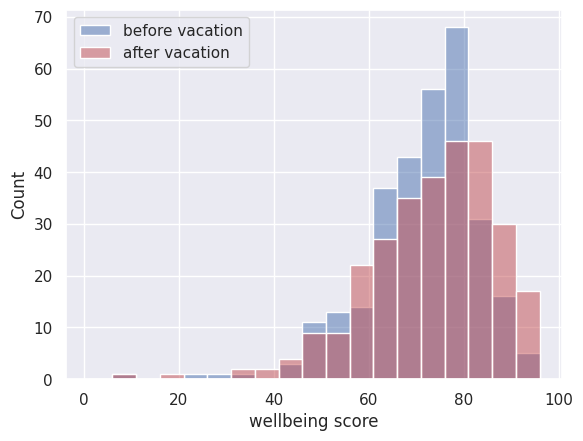

In [3]:
sns.histplot(wb['Score_preVac'], bins=range(1,100,5), color='b', alpha=0.5)
sns.histplot(wb['Score_postVac'], bins=range(1,100,5), color='r', alpha=0.5)
plt.legend(['before vacation', 'after vacation'])
plt.xlabel('wellbeing score')
plt.show()

### Did wellbeing increase over the vacation?

Say I am interested in the change in wellbeing score across the vacation for psychology students.

We are going to calculate the mean change in wellbeing score from pre- to post-vacation measurements and then obtain a bootstrapped confidence interval for this difference

If only a small percentage of simulated samples have a negative change in wellbeing over the vacation, we will conclude that we are confident mean wellbbeing increased over the vacation for psychology students

Let's start by creating a column in our dataframe for the difference in wellbeing score between pre- and post-vacation measurements

In [36]:
wb['Score_diff']=wb['Score_postVac']-wb['Score_preVac']

wb

,ID_code,College,Subject,Score_preVac,Score_postVac,difference,Score_diff
0,247610,Lonsdale,PPE,60,35,25,-25
1,448590,Lonsdale,PPE,43,44,-1,1
2,491100,Lonsdale,engineering,79,69,10,-10
3,316150,Lonsdale,PPE,55,61,-6,6
4,251870,Lonsdale,engineering,62,65,-3,3
...,...,...,...,...,...,...,...
296,440570,Beaufort,history,75,70,5,-5
297,826030,Beaufort,maths,52,49,3,-3
298,856260,Beaufort,Biology,83,84,-1,1
299,947060,Beaufort,engineering,62,65,-3,3


Now let's
<ul>
    <li>get the mean change in wellbeing for psychology students
<li>find out how many psychology students there are
    </ul>

In [37]:
print('mean change = ' + str(wb['Score_diff'].mean()))
print('n = ' + str(len(wb)))





mean change = 2.5847176079734218
n = 301


The mean increase in wellbeing score across the vacation for the 25 Psychology students is 2.68

How confident can we be that wellbeing <i>really</i> increases across the vacation, though? If we surveyed a new sample of Psychology students, how close would the change in wellbeing be to 2.68? Would it still be greater than zero (ie would the vacation still increase wellbeing)?

We need the sampling distribution of the mean! (the mean change in wellbeing across the vac, that is)

Let's simulate it by bootstrapping!

<Axes: ylabel='Count'>

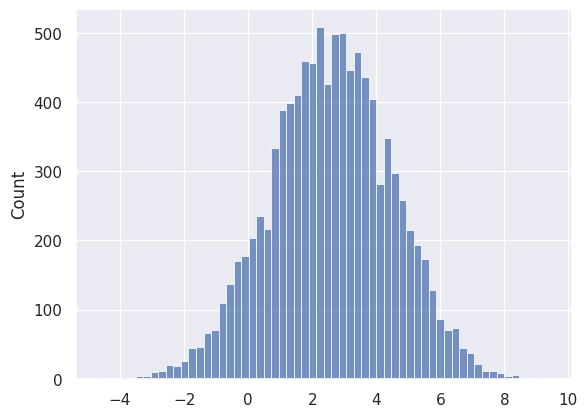

In [41]:
# @title Default title text
nReps = 10000
m = np.empty(nReps)
n = 25

for i in range(nReps):
    sample = wb.sample(n,replace=True) # your code here to draw a sample of size n with replacement from the dataframe wb
    m[i] = (sample['Score_postVac']-sample['Score_preVac']).mean() # the mean change in wellbeing across the vacation for this sample

sns.histplot(m) # plot the sample means

<Axes: ylabel='Count'>

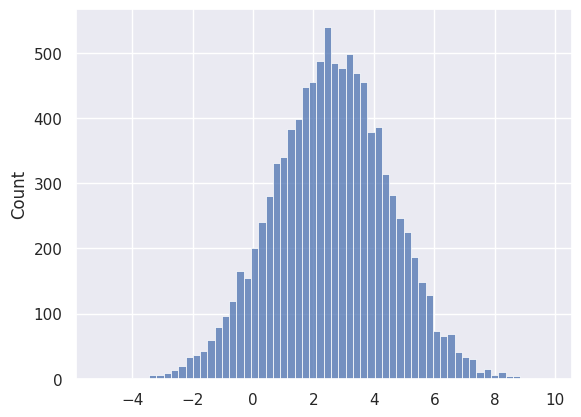

In [45]:
#Can you just resample the differences? (Yes, because we are looking at differences for each individual in each case)
# @title Default title text
nReps = 10000
m = np.empty(nReps)
n = 25

for i in range(nReps):
    sample = wb['Score_diff'].sample(n,replace=True) # your code here to draw a sample of size n with replacement from the dataframe wb
    m[i] = sample.mean() # the mean change in wellbeing across the vacation for this sample

sns.histplot(m) # plot the sample means

We can also work out exactly what percentage of the samples have a negative change in wellbeing

In [47]:
100 * sum(m<0)/len(m)

8.77

I make it about 11% of random (re)samples in which the change in wellbeing is negative.

This is some evidence that the change in wellbeing over the vacation is positive but would not be considered staatstically significant in general - more on statistical significance next term

#### 95% confidence interval

We can define a 95% confidence interval for the change in wellbeing over the vacation in psychology students as the range in which 95% of (re)sample means fall:

In [44]:
# The boundaries of the 95% confidence interval
# exclude the lowest and highest 2.5% of sample means
# (ie exclude 5% of sample means overall)

print('lower bound = ' + str(np.quantile(m,0.025)))
print('upper bound = ' + str(np.quantile(m,0.975)))

lower bound = -1.16
upper bound = 6.24


The confidence interval includes zero, meaning no change in wellbeing (or a negative change) is a plausible value for the population change in wellbeing over the vac

## Is wellbeing higher in Lonsdale than in Beaufort biology students?

Let's try bootstrapping something else!

Say we want to know if wellbeing (as measured before the vacation) is higher in biology students at Lonsdale or Beaufort college.

Let's have a look at the relevant data:

In [54]:
# Get the biology students only from the dataframe
#wb[wb['Subject']=='Biology']

wb.query("Subject=='Biology'")

,ID_code,College,Subject,Score_preVac,Score_postVac,difference,Score_diff
13,171910,Lonsdale,Biology,94,86,8,-8
14,714640,Lonsdale,Biology,85,80,5,-5
17,412830,Lonsdale,Biology,59,61,-2,2
19,145410,Lonsdale,Biology,44,51,-7,7
30,957870,Lonsdale,Biology,55,75,-20,20
33,127470,Lonsdale,Biology,78,75,3,-3
37,342660,Lonsdale,Biology,44,66,-22,22
43,466680,Lonsdale,Biology,57,69,-12,12
53,222450,Lonsdale,Biology,80,93,-13,13
64,402100,Lonsdale,Biology,81,100,-19,19


In [65]:
# count how many biology students in each college using df.value_counts()
# your code here!

wb[wb['Subject']=='Biology'].groupby('College').describe()

ID_code                                                              \
           count           mean            std       min       25%       50%   
College                                                                        
Beaufort    27.0  508263.703704  294331.614172  128230.0  251615.0  467310.0   
Lonsdale    24.0  410725.000000  237704.540389  102430.0  179620.0  407465.0   

                             Score_preVac            ... difference        \
               75%       max        count      mean  ...        75%   max   
College                                              ...                    
Beaufort  779735.0  964640.0         27.0  74.37037  ...       2.00  11.0   
Lonsdale  560722.5  957870.0         24.0  70.00000  ...      -1.25   9.0   

         Score_diff                                                    
              count      mean       std   min   25%  50%    75%   max  
College                                                                
Beaufort       27.0  2.814815  8.124214 -11.0 -2.00  1.0   7.00  21.0  
Lonsdale       24.0  6.541667  9.011969  -9.0  1.25  7.0  12.25  22.0  

[2 rows x 40 columns]

Plot their wellbeing scores (before the vac) in a violin plot

<Axes: xlabel='College', ylabel='Score_preVac'>

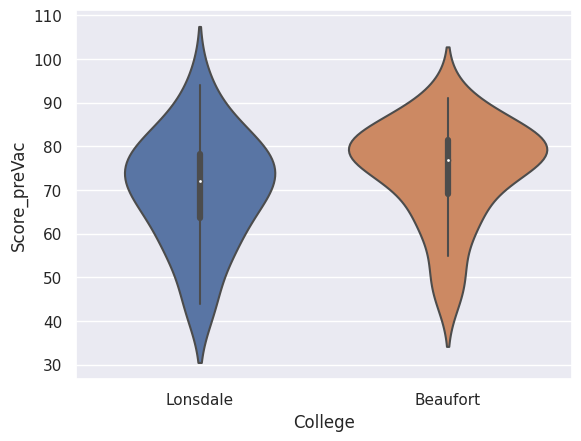

In [66]:
sns.violinplot(data=wb[wb['Subject']=='Biology'], y='Score_preVac', x='College')

It looks like Beaufort biologists had slightly higher wellbeing scores but how confident can we be in that difference?

We need the sampling distribution for the difference of means for wellbeing score between colleges

We can adapt our bootstrap code to do this!

<Axes: ylabel='Count'>

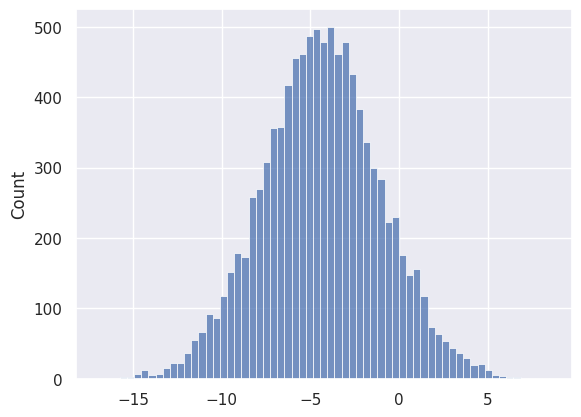

In [76]:
nReps = 10000 # your code here
mDiff = np.empty(nReps)# create an empty array to store the sample means
nL = 24 # number of biologists in Lonsdale college
nB = 27 # number of biologists in Beaufort college

for i in range(nReps):
    sample_Lonsdale = wb.query("Subject=='Biology' and College=='Lonsdale' ").sample(nL, replace=True)#
    sample_Beaufort = wb.query("Subject=='Biology' and College=='Beaufort'").sample(nB,replace=True)#
    mDiff[i] = sample_Lonsdale['Score_preVac'].mean()-sample_Beaufort['Score_preVac'].mean() # mean wellbeing of Beaufort biologists minus mean wellbeing of Lonsdale biologists


sns.histplot(mDiff) # plot the sample means

In what proportion of (re)samples do Lonsdale biologists actually have higher mean wellbeing?

In [78]:
# your code here!
100*sum(mDiff>0)/nReps

9.61

### Bootstrapped correlation between wellbeing scores before and after the vacation

Over the vacation, wellbeing went up overall - but are the students with higher wellbeing before the vacation generally also the ones with higher wellbeing after the vacation?

Let's get an overview by plotting the data

<Axes: xlabel='Score_preVac', ylabel='Score_postVac'>

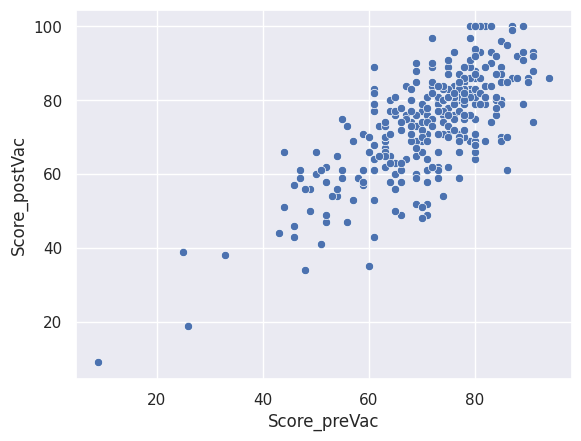

In [79]:
sns.scatterplot(data=wb, x='Score_preVac', y='Score_postVac')

It looks like there is a fairly strong correlation between wellbeing scores before and after the vacation for the same individual.

The correlation might be exaggerated by a few outliers with particularly low scores, so let's use Spearman's correlation coefficient:

In [80]:
wb['Score_preVac'].corr(wb['Score_postVac'], method='spearman')

0.683268050615877

I want to know how confident I can be that wellbeing before and after the vacation are correlated

I need a sampling distribution for the correlation coefficient $r$

I can obtain this using bootstrapping:

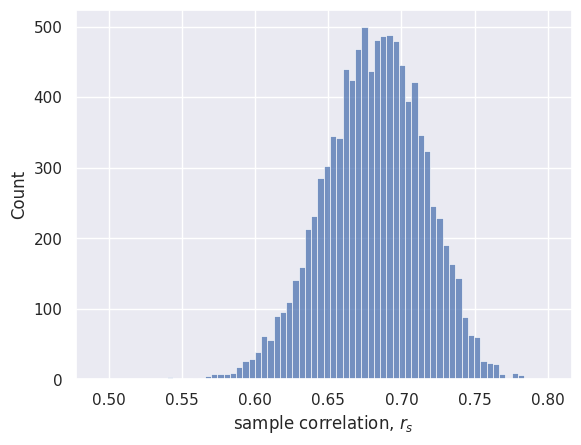

In [94]:
nReps= 10000 # your code here
r= np.empty(nReps)# your code here
n= 301 # your code here

for i in range(nReps):
    sample = wb.sample(n, replace=True) # your code here
    r[i] = sample['Score_preVac'].corr(sample['Score_postVac'], method='spearman')# your code here

sns.histplot(r)
plt.xlabel('sample correlation, $r_s$')
plt.show()

We can see that all the (re)samples have a strong positive correlation between wellbeing before and after the vacation

Can you obtain a 95% confidence interval for the correlation coefficient $r_s$?

In [95]:
# your code here
print(str(np.quantile(r,0.025)) + ',' + str(np.quantile(r,0.975)))

0.6110609753498183,0.7440199950962788


## Further exercises

#### Bootstrapped correlation in a smaller sample

The sample correlation between wellbeing before and after the vacation was very reliably positive, partly because the correlation coefficient was high (in other words, we ca see there *is* a strong correlation in the scatterplot) and partly because $n$ is large

Let's look at the same correlation- wellbeing before and after the vac- in a smaller sample- just the Psychology students:

<Axes: xlabel='Score_preVac', ylabel='Score_postVac'>

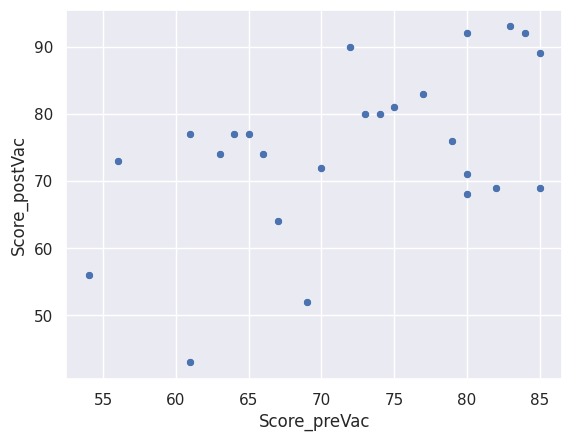

In [86]:
psy=wb[wb['Subject']=='Psychology']
sns.scatterplot(data=psy, x='Score_preVac', y='Score_postVac')

Let's get the correlation coefficient:

In [87]:
psy['Score_preVac'].corr(psy['Score_postVac'], method='spearman')

0.3935596127608406

There is a positive correlation,although it is weaker than the correlation in the whole dataset of 300 students.

Intuitively, just from looking at the scatterplot, it feels that if we drew random samples from just the psychology students, we would find some random samples with a zero or even negative correlation between wellbeing before and after the vacation - much more likely that when we were working with the full dataset of 300 students.

<ul>
    <li> Obtain a bootstrapped sampling distriubtion for the correlation coefficient r
    <li> What proportion of the (re)samples have r less than 0?
    <li> Obtain at 95% confidence interval for r
</ul>

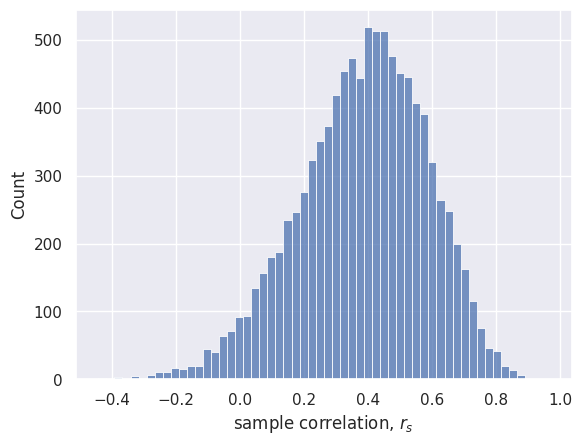

In [96]:
# Your code here!

nReps= 10000 # your code here
r= np.empty(nReps)# your code here
n= 25 # your code here

for i in range(nReps):
    sample = wb.query("Subject=='Psychology'").sample(n,replace=True) # your code here
    r[i] = sample['Score_preVac'].corr(sample['Score_postVac'], method='spearman')# your code here

sns.histplot(r)
plt.xlabel('sample correlation, $r_s$')
plt.show()

In [100]:
print(str(sum(r<0)/len(r)))

print(str(wb['Score_preVac'].quantile(0.06)))

print(str(np.quantile(r,0.025)) + ',' + str(np.quantile(r,0.975)))


0.0382
51.0
-0.04213494883347118,0.7288564193987679
